<a href="https://colab.research.google.com/github/RashminiA6/UMBC-DATA606-Capstone/blob/main/rashmini_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Disease Detection using Convolutional Neural Networks

This project aims to develop a deep learning model for classifying plant diseases using images of leaves. The PlantVillage dataset, containing images of various plant species and their associated diseases, will be used for training and evaluation. A Convolutional Neural Network (CNN) will be employed as the classification model due to its effectiveness in image recognition tasks.

In [1]:
#Importing necessary libraries
import os
from PIL import Image
from zipfile import ZipFile
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import pandas as pd


In [2]:
!ls

 drive	'plantvillage dataset'	 sample_data


In [3]:
# Unzip the dataset
with ZipFile("/content/drive/MyDrive/plantvillage.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
!ls

 drive	'plantvillage dataset'	 sample_data


##Dataset Exploration

In [5]:
print(os.listdir('plantvillage dataset'))

['segmented', 'color', 'grayscale']



The PlantVillage dataset is organized into three folders:

*   **color:** Contains RGB color images of plant leaves.
*   **grayscale:** Contains black and white versions of the images.
*   **segmented:** Contains images with segmented plant parts.

Each folder contains subfolders representing different plant species and their associated diseases.

In [6]:
# Set the path to dataset directory
path_segmented = "plantvillage dataset/segmented"
path_color = "plantvillage dataset/color"
path_grayscale = "plantvillage dataset/grayscale"

# List all folders
folder_segemented = os.listdir(path_segmented)
folder_color = os.listdir(path_color)
folder_grayscale = os.listdir(path_grayscale)

# Print the total number of folders
print(len(folder_segemented))

print(len(folder_color))

print(len(folder_grayscale))

38
38
38


There are a total of 38 categories, including both healthy and diseased plants

In [7]:
# Print each folder name
for folder in folder_color:
    print(folder)

Pepper,_bell___healthy
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Orange___Haunglongbing_(Citrus_greening)
Tomato___Bacterial_spot
Grape___Esca_(Black_Measles)
Apple___Black_rot
Tomato___healthy
Peach___Bacterial_spot
Tomato___Tomato_mosaic_virus
Cherry_(including_sour)___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Cherry_(including_sour)___Powdery_mildew
Blueberry___healthy
Potato___Late_blight
Tomato___Spider_mites Two-spotted_spider_mite
Raspberry___healthy
Peach___healthy
Soybean___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Squash___Powdery_mildew
Potato___Early_blight
Corn_(maize)___Northern_Leaf_Blight
Corn_(maize)___Common_rust_
Grape___Black_rot
Pepper,_bell___Bacterial_spot
Grape___healthy
Tomato___Septoria_leaf_spot
Tomato___Late_blight
Tomato___Target_Spot
Apple___Cedar_apple_rust
Apple___healthy
Apple___Apple_scab
Strawberry___Leaf_scorch
Tomato___Leaf_Mold
Potato___healthy
Tomato___Early_blight
Strawberry___healthy
Corn_(maize)___healthy


In [8]:
for folder in folder_color:
    folder_path = os.path.join(path_color, folder)
    if os.path.isdir(folder_path):
        # List all files in the folder and count them
        image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
        print(f"{folder}: {len(image_files)} images")

Pepper,_bell___healthy: 1478 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Orange___Haunglongbing_(Citrus_greening): 5507 images
Tomato___Bacterial_spot: 2127 images
Grape___Esca_(Black_Measles): 1383 images
Apple___Black_rot: 621 images
Tomato___healthy: 1591 images
Peach___Bacterial_spot: 2297 images
Tomato___Tomato_mosaic_virus: 373 images
Cherry_(including_sour)___healthy: 854 images
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357 images
Cherry_(including_sour)___Powdery_mildew: 1052 images
Blueberry___healthy: 1502 images
Potato___Late_blight: 1000 images
Tomato___Spider_mites Two-spotted_spider_mite: 1676 images
Raspberry___healthy: 371 images
Peach___healthy: 360 images
Soybean___healthy: 5090 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Squash___Powdery_mildew: 1835 images
Potato___Early_blight: 1000 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Corn_(maize)___Common_rust_: 1192 images
Grape___Black_rot: 1180 images
Pepper,_bell__

##Data Visualization

Total categories (diseases + healthy): 38
Categories: ['Pepper,_bell___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Bacterial_spot', 'Grape___Esca_(Black_Measles)', 'Apple___Black_rot', 'Tomato___healthy', 'Peach___Bacterial_spot', 'Tomato___Tomato_mosaic_virus', 'Cherry_(including_sour)___healthy', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Cherry_(including_sour)___Powdery_mildew', 'Blueberry___healthy', 'Potato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Raspberry___healthy', 'Peach___healthy', 'Soybean___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Squash___Powdery_mildew', 'Potato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___Common_rust_', 'Grape___Black_rot', 'Pepper,_bell___Bacterial_spot', 'Grape___healthy', 'Tomato___Septoria_leaf_spot', 'Tomato___Late_blight', 'Tomato___Target_Spot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Apple___Apple

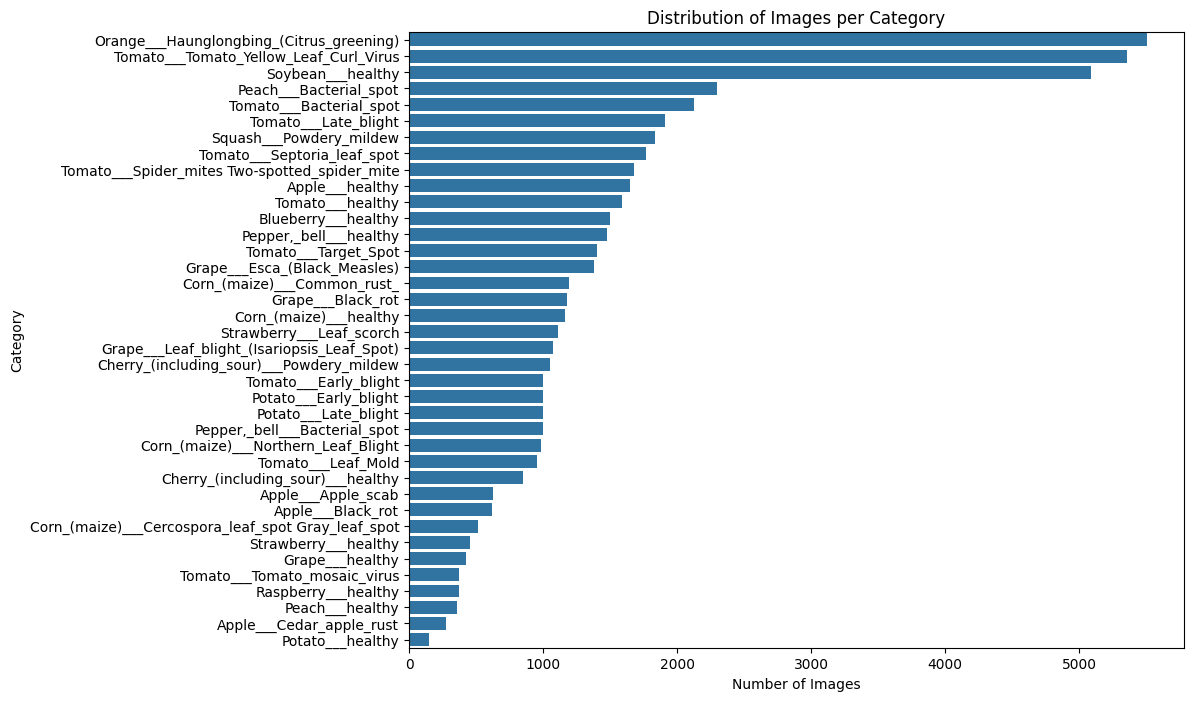

In [9]:

# List all subdirectories (these represent classes)
categories = os.listdir(path_color)


print(f"Total categories (diseases + healthy): {len(categories)}")
print(f"Categories: {categories}")

# Count the number of images per category
category_counts = {category: len(os.listdir(os.path.join(path_color, category))) for category in categories}
category_df = pd.DataFrame(list(category_counts.items()), columns=['Category', 'Number of Images'])

# Plot distribution of images per category
plt.figure(figsize=(10, 8))
sns.barplot(x='Number of Images', y='Category', data=category_df.sort_values(by='Number of Images', ascending=False))
plt.title("Distribution of Images per Category")
plt.show()


In [10]:
total_images = sum(category_counts.values())
print(f"Total number of images: {total_images}")

Total number of images: 54305


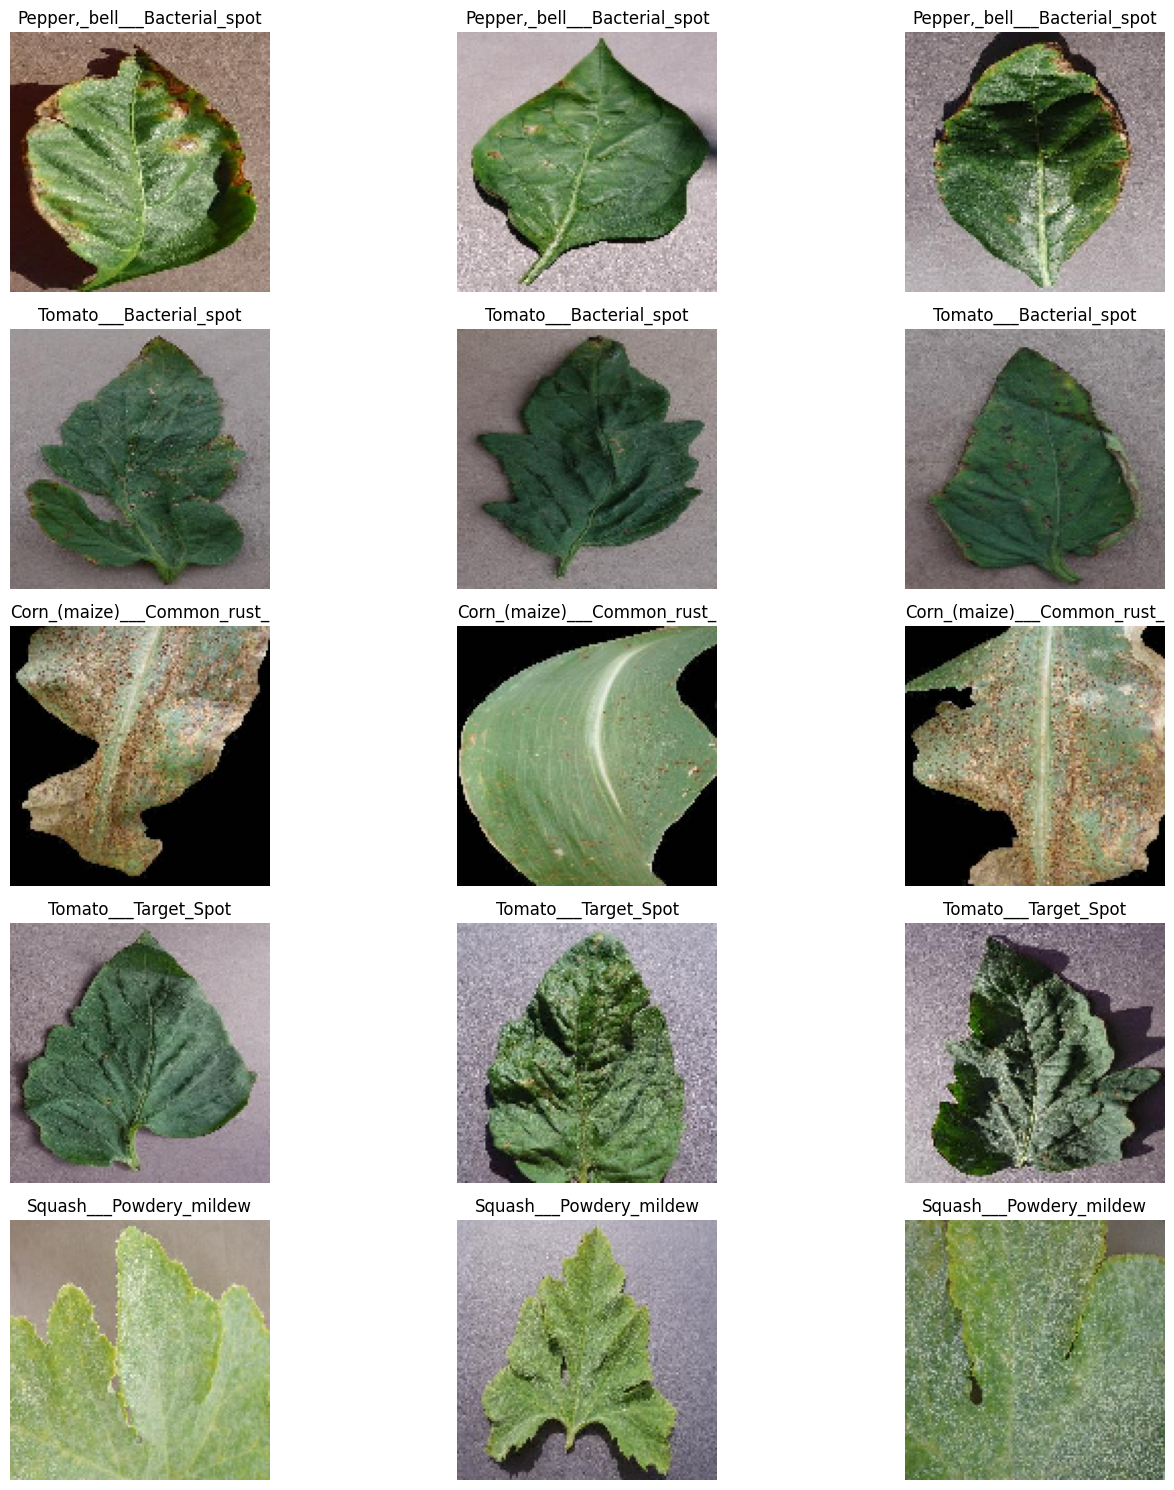

In [11]:
# Display a few sample images
def display_sample_images(categories, path_color, num_images=3):
    fig, axes = plt.subplots(len(categories), num_images, figsize=(15, 15))
    for i, category in enumerate(categories):
        category_path = os.path.join(path_color, category)
        images = os.listdir(category_path)[:num_images]
        for j, img in enumerate(images):
            img_path = os.path.join(category_path, img)
            img = load_img(img_path, target_size=(128, 128))
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            axes[i, j].set_title(category)

    plt.tight_layout()
    plt.show()

# Show samples from 5 random categories
import random
sample_categories = random.sample(categories, 5)
display_sample_images(sample_categories, path_color)

In [12]:
avg_sizes = {}
for category in categories:
    widths = []
    heights = []
    category_path = os.path.join(path_color, category)
    for image_file in os.listdir(category_path):
        img_path = os.path.join(category_path, image_file)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    avg_width = sum(widths) / len(widths) if widths else 0
    avg_height = sum(heights) / len(heights) if heights else 0
    avg_sizes[category] = (avg_width, avg_height)

# Print average sizes
for category, size in avg_sizes.items():
    print(f"{category}: Average size - {size}")

Pepper,_bell___healthy: Average size - (256.0, 256.0)
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: Average size - (256.0, 256.0)
Orange___Haunglongbing_(Citrus_greening): Average size - (256.0, 256.0)
Tomato___Bacterial_spot: Average size - (256.0, 256.0)
Grape___Esca_(Black_Measles): Average size - (256.0, 256.0)
Apple___Black_rot: Average size - (256.0, 256.0)
Tomato___healthy: Average size - (256.0, 256.0)
Peach___Bacterial_spot: Average size - (256.0, 256.0)
Tomato___Tomato_mosaic_virus: Average size - (256.0, 256.0)
Cherry_(including_sour)___healthy: Average size - (256.0, 256.0)
Tomato___Tomato_Yellow_Leaf_Curl_Virus: Average size - (256.0, 256.0)
Cherry_(including_sour)___Powdery_mildew: Average size - (256.0, 256.0)
Blueberry___healthy: Average size - (256.0, 256.0)
Potato___Late_blight: Average size - (256.0, 256.0)
Tomato___Spider_mites Two-spotted_spider_mite: Average size - (256.0, 256.0)
Raspberry___healthy: Average size - (256.0, 256.0)
Peach___healthy: Average siz

## Data Augmentation

In [13]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

In [14]:
train_generator = datagen.flow_from_directory(
    path_color,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 43456 images belonging to 38 classes.


In [15]:
val_generator = datagen.flow_from_directory(
    path_color,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 10849 images belonging to 38 classes.


In [16]:
from tensorflow.keras import Input

model = models.Sequential([
    Input(shape=(128, 128, 3)),  # Use Input layer to define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(38, activation='softmax')  # 38 categories for classification
])


In [17]:

# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           4,902 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,309,542 (12.62 MB)

 Trainable params: 3,309,542 (12.62 MB)

 Non-trainable params: 0 (0.00 B)

Model Architecture

The CNN model consists of the following layers:

*   **Convolutional Layers:** Extract features from the input images.
*   **Max Pooling Layers:** Reduce the spatial dimensions of the feature maps, decreasing computational complexity and providing some translation invariance.
*   **Flatten Layer:** Convert the multi-dimensional feature maps into a one-dimensional vector.
*   **Dense Layers:** Perform classification based on the extracted features.

The ReLU activation function is used in the convolutional and dense layers to introduce non-linearity, allowing the model to learn complex patterns. The softmax activation function is used in the output layer to produce probability distributions over the different categories.

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 300s 215ms/step - accuracy: 0.4037 - loss: 2.1905 - val_accuracy: 0.7030 - val_loss: 0.9667
Epoch 2/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 282s 207ms/step - accuracy: 0.7231 - loss: 0.8816 - val_accuracy: 0.8002 - val_loss: 0.6418
Epoch 3/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 281s 206ms/step - accuracy: 0.8071 - loss: 0.6007 - val_accuracy: 0.8372 - val_loss: 0.5011
Epoch 4/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 350s 226ms/step - accuracy: 0.8461 - loss: 0.4839 - val_accuracy: 0.8653 - val_loss: 0.4198
Epoch 5/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 282s 207ms/step - accuracy: 0.8646 - loss: 0.4190 - val_accuracy: 0.8731 - val_loss: 0.3933
Epoch 6/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 320s 206ms/step - accuracy: 0.8851 - loss: 0.3547 - val_accuracy: 0.8796 - val_loss: 0.3718
Epoch 7/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 281s 206ms/step - accuracy: 0.8980 - loss: 0.3146 - val_accuracy: 0.8818 - val_loss: 0.3576
Epoch 8/15
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 290s 213ms/step - accuracy: 0.9

In [20]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(val_generator)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

340/340 ━━━━━━━━━━━━━━━━━━━━ 57s 167ms/step - accuracy: 0.9359 - loss: 0.1883
Validation Loss: 0.1741115152835846
Validation Accuracy: 0.9416536092758179


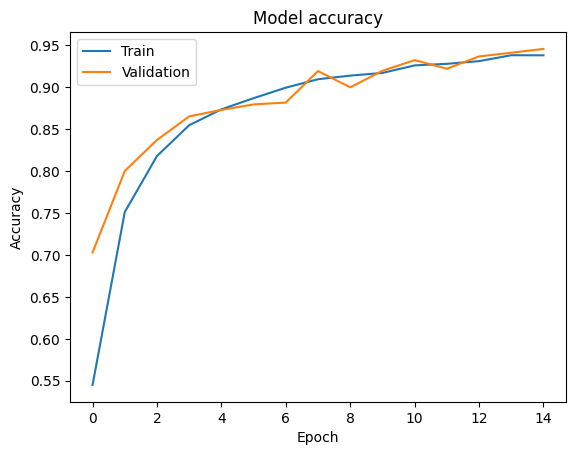

In [21]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


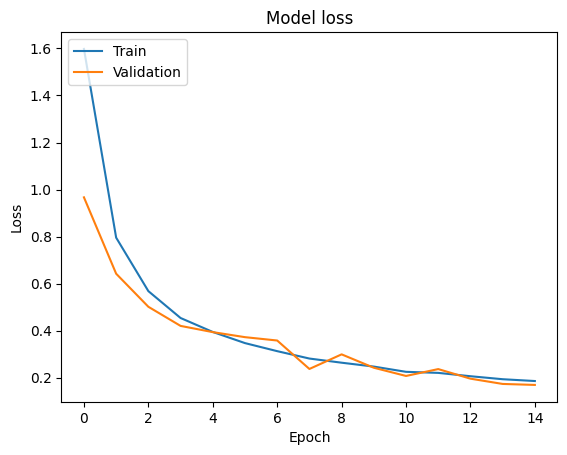

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [37]:
# Load and preprocess the image
img_path = '/content/drive/MyDrive/plant_test_images/tomototargetspot_test.JPG'
img = load_img(img_path, target_size=(128, 128))
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

# Print or display the predicted class
print(f'Predicted class: {predicted_class}')
# You can map predicted_class back to the actual category name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: 34


In [38]:
# Get the mapping of class indices to category names
class_indices = train_generator.class_indices

# Reverse the mapping to get category names from indices
idx_to_class = {v: k for k, v in class_indices.items()}

# Get the predicted category name
predicted_category_name = idx_to_class[predicted_class]

# Print the predicted category name
print(f'Predicted category: {predicted_category_name}')

Predicted category: Tomato___Target_Spot


In [39]:
model.save('/content/drive/MyDrive/plant_disease_cnnmodel.keras')


In [40]:
model.save('plant_disease_cnnmodel.keras')